### Phân tán dữ liệu ( Data Discretization ) 

Data Discretization (Phân tán dữ liệu) là quá trình chia nhỏ các giá trị liên tục thành các khoảng 

Equal Frequency Discretization là một phương pháp phân tán dữ liệu trong đó chúng ta chia các giá trị thành các phân khúc có số lượng quan sát gần như bằng nhau.

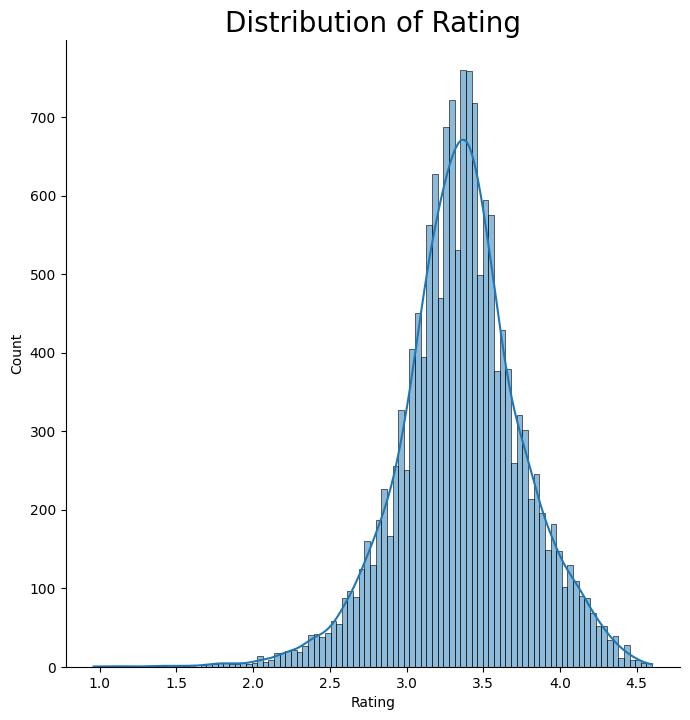

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Thư viện dùng để chuẩn hóa
from sklearn.preprocessing import StandardScaler
# Thư viện dùng để huấn luyện mô hình
from sklearn.linear_model import LinearRegression

df= pd.read_csv("Anime.csv")

# Vẽ biểu đồ phân bố của cột Rating, kết hợp đường mật độ hạt nhân kde để hiểu rõ hơn về phân bố xác suất của dữ liệu.
sns.displot(df.Rating, height = 7, kde= True)
plt.title("Distribution of Rating", size= 20)
plt.show()

Chuyển đổi dữ liệu liên tục của cột Rating thành dữ liệu rời rạc

In [38]:
# Tìm các giá trị duy nhất trong cột Rating
df['Rating'].unique()

array([4.6 , 4.58, 4.57, 4.56, 4.55, 4.54, 4.53, 4.51, 4.5 , 4.48, 4.47,
       4.46, 4.45, 4.44, 4.43, 4.42, 4.4 , 4.39, 4.38, 4.37, 4.36, 4.35,
       4.34, 4.33, 4.32, 4.31, 4.3 , 4.29, 4.28, 4.27, 4.26, 4.25, 4.24,
       4.23, 4.22, 4.21, 4.2 , 4.19, 4.18, 4.17, 4.16, 4.15, 4.14, 4.13,
       4.12, 4.11, 4.1 , 4.09, 4.08, 4.07, 4.06, 4.05, 4.04, 4.03, 4.02,
       4.01, 4.  ,  nan, 3.99, 3.98, 3.97, 3.96, 3.95, 3.94, 3.93, 3.92,
       3.91, 3.9 , 3.89, 3.88, 3.87, 3.86, 3.85, 3.84, 3.83, 3.82, 3.81,
       3.8 , 3.79, 3.78, 3.77, 3.76, 3.75, 3.74, 3.73, 3.72, 3.71, 3.7 ,
       3.69, 3.68, 3.67, 3.66, 3.65, 3.64, 3.63, 3.62, 3.61, 3.6 , 3.59,
       3.58, 3.57, 3.56, 3.55, 3.54, 3.53, 3.52, 3.51, 3.5 , 3.49, 3.48,
       3.47, 3.46, 3.45, 3.44, 3.43, 3.42, 3.41, 3.4 , 3.39, 3.38, 3.37,
       3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3 , 3.29, 3.28, 3.27, 3.26,
       3.25, 3.24, 3.23, 3.22, 3.21, 3.2 , 3.19, 3.18, 3.17, 3.16, 3.15,
       3.14, 3.13, 3.12, 3.11, 3.1 , 3.09, 3.08, 3.

In [39]:
# Tạo mảng chứa các giá trị duy nhất của cột Rating

# Giả sử giá trị nan = 3.36

rating_values = np.array([4.6 , 4.58, 4.57, 4.56, 4.55, 4.54, 4.53, 4.51, 4.5 , 4.48, 4.47,
       4.46, 4.45, 4.44, 4.43, 4.42, 4.4 , 4.39, 4.38, 4.37, 4.36, 4.35,
       4.34, 4.33, 4.32, 4.31, 4.3 , 4.29, 4.28, 4.27, 4.26, 4.25, 4.24,
       4.23, 4.22, 4.21, 4.2 , 4.19, 4.18, 4.17, 4.16, 4.15, 4.14, 4.13,
       4.12, 4.11, 4.1 , 4.09, 4.08, 4.07, 4.06, 4.05, 4.04, 4.03, 4.02,
       4.01, 4.  ,   3.36    , 3.99, 3.98, 3.97, 3.96, 3.95, 3.94, 3.93, 3.92,
       3.91, 3.9 , 3.89, 3.88, 3.87, 3.86, 3.85, 3.84, 3.83, 3.82, 3.81,
       3.8 , 3.79, 3.78, 3.77, 3.76, 3.75, 3.74, 3.73, 3.72, 3.71, 3.7 ,
       3.69, 3.68, 3.67, 3.66, 3.65, 3.64, 3.63, 3.62, 3.61, 3.6 , 3.59,
       3.58, 3.57, 3.56, 3.55, 3.54, 3.53, 3.52, 3.51, 3.5 , 3.49, 3.48,
       3.47, 3.46, 3.45, 3.44, 3.43, 3.42, 3.41, 3.4 , 3.39, 3.38, 3.37,
       3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3 , 3.29, 3.28, 3.27, 3.26,
       3.25, 3.24, 3.23, 3.22, 3.21, 3.2 , 3.19, 3.18, 3.17, 3.16, 3.15,
       3.14, 3.13, 3.12, 3.11, 3.1 , 3.09, 3.08, 3.07, 3.06, 3.05, 3.04,
       3.03, 3.02, 3.01, 3.  , 2.99, 2.98, 2.97, 2.96, 2.95, 2.94, 2.93,
       2.92, 2.91, 2.9 , 2.89, 2.88, 2.87, 2.86, 2.85, 2.84, 2.83, 2.82,
       2.81, 2.8 , 2.79, 2.78, 2.77, 2.76, 2.75, 2.74, 2.73, 2.72, 2.71,
       2.7 , 2.69, 2.68, 2.67, 2.66, 2.65, 2.64, 2.63, 2.62, 2.61, 2.6 ,
       2.59, 2.58, 2.57, 2.56, 2.55, 2.54, 2.53, 2.52, 2.51, 2.5 , 2.49,
       2.48, 2.47, 2.46, 2.45, 2.44, 2.43, 2.42, 2.41, 2.4 , 2.39, 2.38,
       2.37, 2.36, 2.35, 2.34, 2.33, 2.32, 2.31, 2.3 , 2.29, 2.28, 2.27,
       2.26, 2.25, 2.24, 2.23, 2.22, 2.21, 2.2 , 2.19, 2.18, 2.17, 2.16,
       2.15, 2.14, 2.13, 2.12, 2.11, 2.1 , 2.09, 2.08, 2.07, 2.06, 2.05,
       2.04, 2.03, 2.02, 2.01, 2.  , 1.98, 1.96, 1.95, 1.93, 1.92, 1.9 ,
       1.89, 1.87, 1.86, 1.82, 1.81, 1.8 , 1.77, 1.76, 1.75, 1.73, 1.72,
       1.71, 1.69, 1.67, 1.61, 1.57, 1.53, 1.48, 1.41, 1.4 , 1.39, 1.3 ,
       1.19, 1.11, 1.06, 0.96])

# Chia ra thành 5 khoảng (bins)
num_bins_new = 5
# Tính chiều dài mỗi khoảng
interval_length = (rating_values.max() - rating_values.min())/ num_bins_new
# Tạo danh sách bins chứa các bin
bins=[]
for i in range (num_bins_new + 1):
    bin_i = rating_values.min() + i * interval_length 
    bins.append(bins_i)
# Chuyển đổi dữ liệu liên tục thành rời rạc ( tạo thêm cột Rating_binned chứa các bins có nhãn từ 0 đến 4)
df['Rating_binned'] = pd.cut(df['Rating'], bins = bins, labels= range(num_bins_new), include_lowest=True)
# In ra các bins vừa tạo
for i in range (num_bins_new):
    print(f"Bin {i} : {bins[i]:.2f} - {bins[i+1]:.2f}")


ValueError: Bin edges must be unique: Index([4.6, 4.6, 4.6, 4.6, 4.6, 4.6], dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

C:\Users\PC\AppData\Local\Temp\ipykernel_35428\147270481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'Rating_binned', data = df, palette = 'viridis')


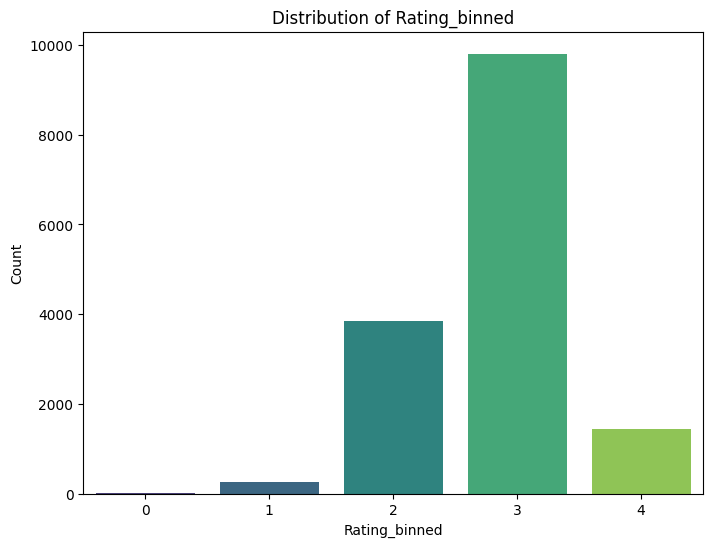

In [ ]:
# Vẽ biểu đồ phân phối của các cột Rating_binned
plt.figure(figsize = (8, 6))
# Vẽ biểu đồ đếm( countplot)
sns.countplot( x = 'Rating_binned', data = df, palette = 'viridis')
plt.title('Distribution of Rating_binned')
plt.xlabel('Rating_binned')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Rank             18495 non-null  int64   
 1   Name             18495 non-null  object  
 2   Japanese_name    7938 non-null   object  
 3   Type             18495 non-null  object  
 4   Episodes         9501 non-null   float64 
 5   Studio           12018 non-null  object  
 6   Release_season   4116 non-null   object  
 7   Tags             18095 non-null  object  
 8   Rating           15364 non-null  float64 
 9   Release_year     18112 non-null  float64 
 10  End_year         2854 non-null   float64 
 11  Description      18491 non-null  object  
 12  Content_Warning  1840 non-null   object  
 13  Related_Mange    7627 non-null   object  
 14  Related_anime    10063 non-null  object  
 15  Voice_actors     15309 non-null  object  
 16  staff            13005 non-null  object 

### Xử lí ngoại lệ ( Outliers Handling)

<Axes: ylabel='Release_year'>

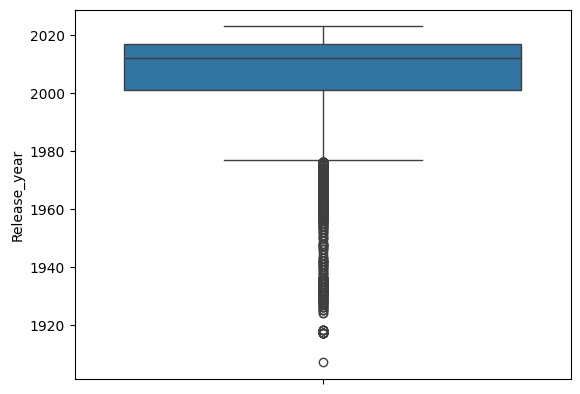

In [ ]:
# Xét cột Release_year để xử lí ngoại lệ
# Vẽ biểu đồ hộp
sns.boxplot( y='Release_year', data= df)

In [ ]:
# Tính IQR ( là một thước đo độ phân tán của dữ liệu và biểu thị khoảng cách giữa phần tư thứ ba (Q3) và phần tư thứ nhất (Q1))
# IQR = Q3 - Q1
IQR = df["Release_year"].quantile(0.75) - df["Release_year"].quantile(0.25)

# Tính giới hạn dưới
lower_Release_year_limit = df["Release_year"].quantile(0.25) - (IQR * 1.5)
# Tính giới hạn trên
upper_Release_year_limit = df["Release_year"].quantile(0.75) + (IQR * 1.5)

# In ra các giới hạn
print(lower_Release_year_limit)
print(upper_Release_year_limit)

1977.0
2041.0


<Axes: ylabel='Release_year'>

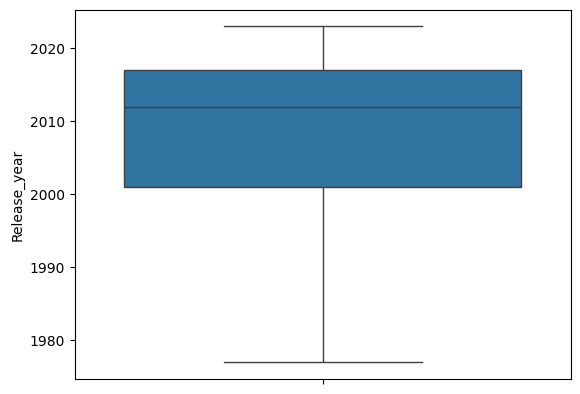

In [ ]:
# Điều chỉnh giá trị của cột 'Release_year' sao cho:
    # Nếu giá trị lớn hơn giới hạn trên, nó được gán bằng giới hạn trên.
    # Nếu giá trị nhỏ hơn giới hạn dưới, nó được gán bằng giới hạn dưới.
    # Nếu giá trị nằm trong khoảng giữa, nó giữ nguyên giá trị hiện tại. 
                                   
df['Release_year'] = np.where(df['Release_year'] > upper_Release_year_limit, upper_Release_year_limit, df['Release_year'])
df['Release_year'] = np.where(df['Release_year'] < lower_Release_year_limit, lower_Release_year_limit, df['Release_year'])

# Vẽ lại biểu đồ hộp sau xử lí
sns.boxplot ( y='Release_year', data = df)

### Chuẩn hóa dữ liệu (StandardScaler)

StandardScaler chuẩn hóa các đặc điểm của dữ liệu sao cho chúng có phân phối chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng 1.

In [ ]:
# Khởi tạo đối tượng StandardScaler dùng để chuẩn hóa các đặc điểm của dữ liệu
scaler = StandardScaler()

# Chuẩn hóa dữ liệu, dùng fit_transform để chuẩn hóa ( tính toán và áp dụng các thông số trung bình và độ lệch chuẩn cho từng đặc điểm)
df_scaled = scaler.fit_transform(df)

# Do kết quả sau chuẩn hóa là numpy array nên chuyển kết quả sang DataFrame (giữ nguyên các tên cột gốc)
df_scaled = pd.DataFrame(df_scaled, column= df.columns)

# Loại bỏ cột Rating_binned khỏi dataframe sau khi được chuẩn hóa
df_scaled.drop('Rating_binned', axis=1 , inplace = True)



ValueError: could not convert string to float: 'Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc'

Text(0.5, 1.0, 'Trước khi scale Release_year')

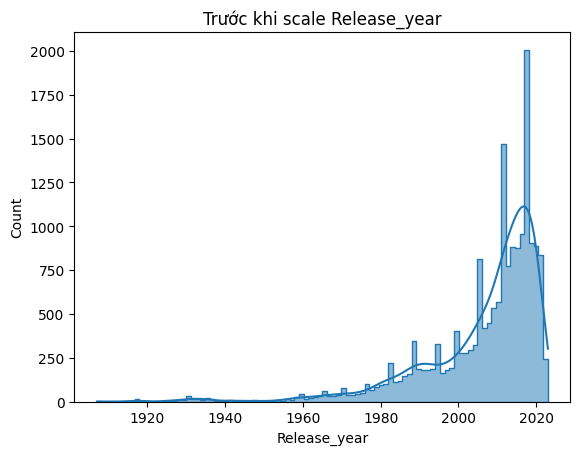

In [ ]:
# Vẽ biểu đồ histogram, so sánh một vài data trước và sau khi chuẩn hóa
sns.histplot(df['Release_year'], kde= True, element= 'step')
plt.title(f'Trước khi scale Release_year')

In [ ]:
sns.histplot(df_scaled['Release_year'], kde= True, element= 'step')
plt.title(f'Sau khi scale Release_year')

NameError: name 'df_scaled' is not defined

Text(0.5, 1.0, 'Trước khi scale Episodes')

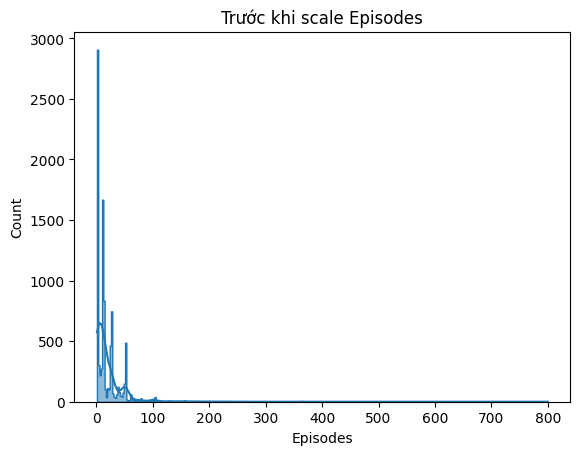

In [ ]:
sns.histplot(df['Episodes'], kde= True, element= 'step')
plt.title(f'Trước khi scale Episodes')

In [ ]:
sns.histplot(df_scaled['Episodes'], kde= True, element= 'step')
plt.title(f'Sau khi scale Episodes')

NameError: name 'df_scaled' is not defined

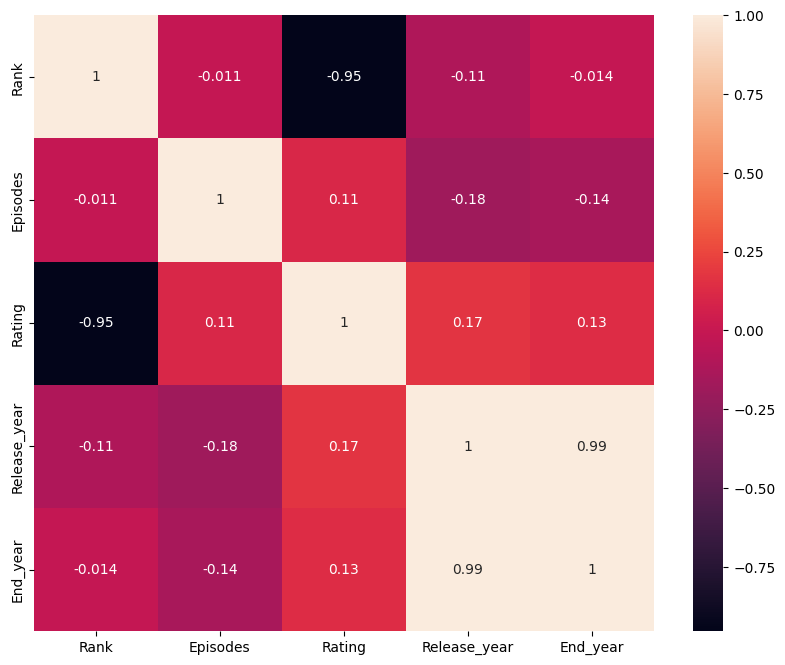

In [ ]:
# Vẽ ma trận tương quan của data
'''Hệ số tương quan đo lường mức độ liên quan giữa hai biến. Nó có giá trị từ -1 đến 1:
        1: Tương quan dương hoàn hảo, nghĩa là khi một biến tăng thì biến kia cũng tăng.
        -1: Tương quan âm hoàn hảo, nghĩa là khi một biến tăng thì biến kia giảm.
        0: Không có tương quan giữa hai biến, nghĩa là không có mối quan hệ tuyến tính giữa chúng.
'''
# Tính toán ma trận tương quan giữa các cột mang giá trị là số
correlation = df.corr(numeric_only=True)

# Tạo ảnh
plt.figure (figsize = (10,8))

#Vẽ heatmap( biểu đồ nhiệt) để thể hiện ma trận tương quan
sns.heatmap(correlation, annot = True)
plt.show()


In [ ]:
# Bỏ cột Rank và Rating vì chúng có chứa giá trị tương quan âm lớn
# Xóa để giảm gây nhiễu và tăng tốc độ huấn luyện mô hình
df_scaled.drop(['Rank','Rating'], axis = 1, inplace = True)
print (df_scaled)

NameError: name 'df_scaled' is not defined

### Huấn luyện mô hình ( Linear Regression)

In [ ]:
# Chọn label là cột Rating, các cột còn lại là features

# X là dataframe chứa tất cả các cột đã được chuẩn hóa ( trừ cột Rating)
X = df_scaled.drop('Rating', axis=1) 

# y là cột Rating
y = df_scaled['Rating']

# Chia dữ liệu thành tập huấn luyện( 80%) và tập kiểm tra( 20%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In ra kích thước của tập huấn luyện và tập kiểm tra
print("Kích thước tập huấn luyện:", x_train.shape)
print("Kích thước tập kiểm tra:", x_test.shape)

NameError: name 'df_scaled' is not defined

In [ ]:
# Khởi tạo mô hình Linear Regression ( hồi quy tuyến tính)
model = LinearRegression()

# Huấn luyện mô hình: Mô hình sẽ học từ dữ liệu để xác định mối quan hệ giữa các đặc điểm (features) và nhãn (labels). 
model.fit(x_train, y_train)

# Tính giá trị dự đoán dựa trên tập dữ liệu kiểm tra x_test
y_pred = model.predict(x_test)      

# In ra giá trị thực tế, giá trị dự đoán và giá trị chênh lệch giữa thực tế và dự đoán
print("Giá trị thực tế\t\tGiá trị dự đoán\t\tChênh lệch")
for i in range(10):
    print(f"{y_test.iloc[i]}\t\t{y_pred[i]:.2f}\t\t{y_test.iloc[i] - y_pred[i]:.2f}")

NameError: name 'x_train' is not defined

In [ ]:
# In ra kết quả đánh giá mô hình trên bằng cách tính toán lỗi trung bình tuyệt đối giữa giá trị thực tế và giá trị dự đoán
from sklearn.metrics import mean_absolute_error

# Đánh giá mô hình dựa trên MAE 
# MAE đo lường mức độ chênh lệch trung bình giữa giá trị thực tế và giá trị dự đoán. 
# Giá trị MAE càng nhỏ thì mô hình càng tốt, vì điều này chỉ ra rằng giá trị dự đoán gần với giá trị thực tế.
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae) 



NameError: name 'y_test' is not defined